In [1]:
import sounddevice as sd
from matplotlib import pyplot as plt
import time
from numpy import fft
import numpy as np
import soundfile as sf
from numpy import mean
import os
import matplotlib.animation as animation
from matplotlib import style

style.use('fivethirtyeight')



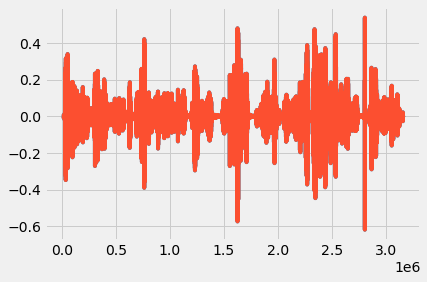

In [2]:
data, info = sf.read("examples/audio_2021-07-27_10-07-33.wav")
plt.plot(data)
plt.show()

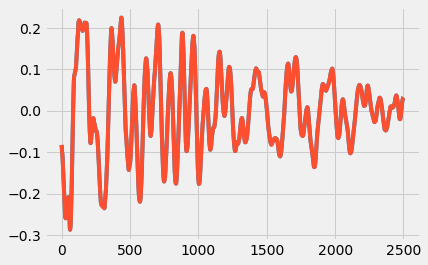

rate: 48000


In [3]:
plt.plot(data[40000:42500])
plt.show()
print("rate: " + str(info))

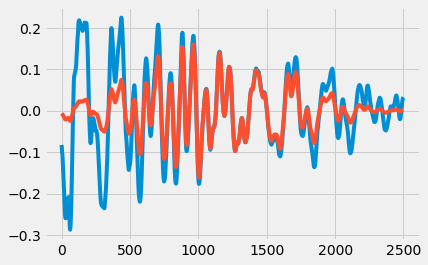

In [10]:
audio = mean(data[40000:42500], axis=1)
plt.plot(audio)

hammed = audio * np.hamming(2500)
plt.plot(hammed)
plt.show()

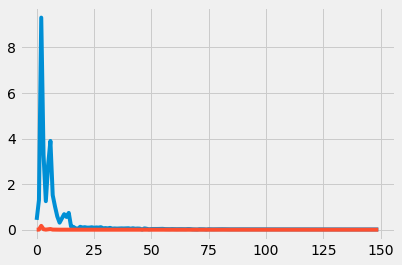

In [25]:
furier =  np.absolute(fft.fft(audio))
# plt.plot(furier[0:150])

hamfurier = np.absolute(fft.fft(hammed)) 
# plt.plot(hamfurier[0:150])

furier1 =  np.absolute(fft.rfft(audio, 512))
# plt.plot(furier1[0:150])

hamfurier1 = np.absolute(fft.rfft(hammed, 512))
# plt.plot(hamfurier1[0:150])

pow_frames = ((1.0 / 512) * ((hamfurier1) ** 2))
plt.plot(pow_frames[0:150])

plt.show()

In [ ]:
sample_rate = 48000
low_freq_mel = 0
nfilt = 40
NFFT = 512
high_freq_mel = (2595 * np.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
bin = np.floor((NFFT + 1) * hz_points / sample_rate)

fbank = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))
for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m - 1])   # left
    f_m = int(bin[m])             # center
    f_m_plus = int(bin[m + 1])    # right

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
filter_banks = np.dot(pow_frames, fbank.T)
filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)  # Numerical Stability
filter_banks = 20 * np.log10(filter_banks)  # dB

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    print(i)
    if( (i + 1) * 2500 < len(data) ):
        fur1 = fft.fft(mean(data[i*2500:(i+1)*2500], axis=1))
        ax1.clear()
        ax1.plot(fur1[0:150])

ani = animation.FuncAnimation(fig, animate, interval=200)
plt.show()